In [ ]:
import tensorflow as tf
from keras import datasets, layers, models, Input
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Training data shape = {X_train.shape}")
print(f"Training labels shape = {y_train.shape}")
print(f"Testing data shape = {X_test.shape}")
print(f"Testing labels shape = {y_test.shape}")

Training data shape = (60000, 28, 28)
Training labels shape = (60000,)
Testing data shape = (10000, 28, 28)
Testing labels shape = (10000,)


In [ ]:
X_train.max()

255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Build the CNN model
model = models.Sequential([
    # First Convolutional Layer with Leaky ReLU
    Input(shape=(28, 28, 1)),  # Use Input layer for the input shape
    layers.Conv2D(32, (3, 3)),
    layers.LeakyReLU(negative_slope=0.01),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer with Leaky ReLU
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(negative_slope=0.01),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer with Leaky ReLU
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(negative_slope=0.01),

    # Flatten the results to feed into the fully connected layers
    layers.Flatten(),

    # Fully Connected Layer with Leaky ReLU
    layers.Dense(64),
    layers.LeakyReLU(negative_slope=0.01),

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=512)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 457ms/step - accuracy: 0.8719 - loss: 0.3603 - val_accuracy: 0.8777 - val_loss: 0.3457
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 83s 470ms/step - accuracy: 0.8837 - loss: 0.3216 - val_accuracy: 0.8774 - val_loss: 0.3398
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 81s 464ms/step - accuracy: 0.8904 - loss: 0.3092 - val_accuracy: 0.8855 - val_loss: 0.3213
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 81s 458ms/step - accuracy: 0.8935 - loss: 0.2931 - val_accuracy: 0.8827 - val_loss: 0.3261
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 461ms/step - accuracy: 0.8945 - loss: 0.2901 - val_accuracy: 0.8842 - val_loss: 0.3199
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 81s 457ms/step - accuracy: 0.9015 - loss: 0.2723 - val_accuracy: 0.8973 - val_loss: 0.2928
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 453ms/step - accuracy: 0.9048 - loss: 0.2630 - val_accuracy: 0.8941 - val_loss: 0.2909
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 455ms/step - accuracy: 0.9079 - loss: 0.2512 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9043 - loss: 0.2815
Test accuracy: 0.9039999842643738
Loss: 0.27130264043807983


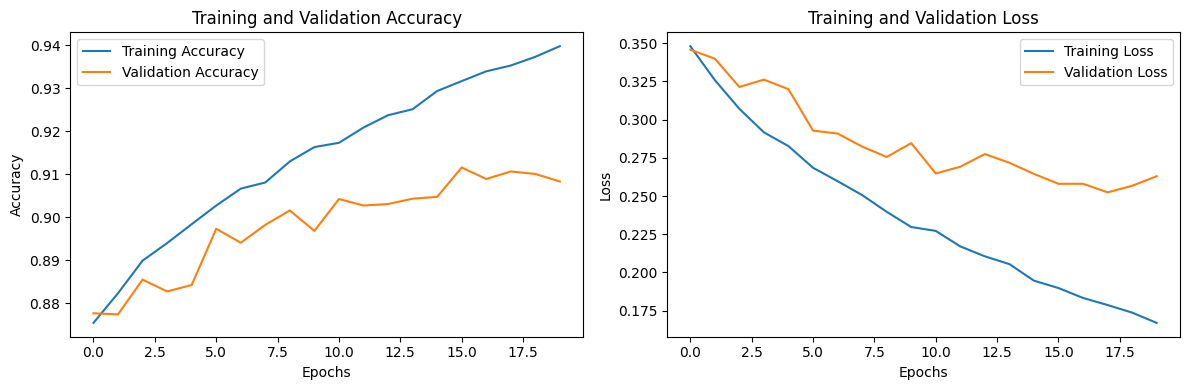

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()